# Decision Tree - Draft

## Pros
-works well with categorical data and numerical data

-No scaling required as they are not sensitive to the variance of data

## Cons
-Overfitting


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data



In [6]:
loans = pd.read_csv('loan_data.csv')

In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Dealing with Categorical Features


In [8]:
cat_feats = ['purpose']

In [9]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [11]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Define Target Variable

In [12]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']


## Train Test Split (70/30)
#### random_state '42' just a random number that helps to reproduce the same result after reuse the train_test_split
#### stratified splitting for y-variable proportionate to train/test ratio

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

## Training a Decision Tree Model


In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtree = DecisionTreeClassifier(max_depth=3)

In [102]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Model Performance / Confusion Matrix


In [103]:
predictions = dtree.predict(X_test)

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

### Precision = True Positive/ (True Positive + False Positive)
### Recall = True Positive / (True Positive + False Negative)
### F1-score = combined metrics of Precision & Recall

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.46      0.02      0.05       460

    accuracy                           0.84      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874



In [106]:
print(confusion_matrix(y_test,predictions))

[[2401   13]
 [ 449   11]]


## Tree Visualization

In [98]:
pip install pydot


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
from IPython.display import Image  
from io import StringIO   
from sklearn.tree import export_graphviz
import pydot 

features = list(final_data.columns[1:])


[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.269\nsamples = 6704\nvalue = [5631, 1073]'),
 Text(0.25, 0.625, 'X[17] <= 0.5\ngini = 0.404\nsamples = 1304\nvalue = [938, 366]'),
 Text(0.125, 0.375, 'X[9] <= 5.5\ngini = 0.392\nsamples = 1216\nvalue = [890, 326]'),
 Text(0.0625, 0.125, 'gini = 0.365\nsamples = 940\nvalue = [714, 226]'),
 Text(0.1875, 0.125, 'gini = 0.462\nsamples = 276\nvalue = [176, 100]'),
 Text(0.375, 0.375, 'X[4] <= 7.305\ngini = 0.496\nsamples = 88\nvalue = [48, 40]'),
 Text(0.3125, 0.125, 'gini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 65\nvalue = [30, 35]'),
 Text(0.75, 0.625, 'X[1] <= 0.093\ngini = 0.228\nsamples = 5400\nvalue = [4693, 707]'),
 Text(0.625, 0.375, 'X[2] <= 558.205\ngini = 0.095\nsamples = 1118\nvalue = [1062, 56]'),
 Text(0.5625, 0.125, 'gini = 0.089\nsamples = 1109\nvalue = [1057, 52]'),
 Text(0.6875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.875, 0.375, 'X[1] <= 0.161\ngini = 0.258\nsampl

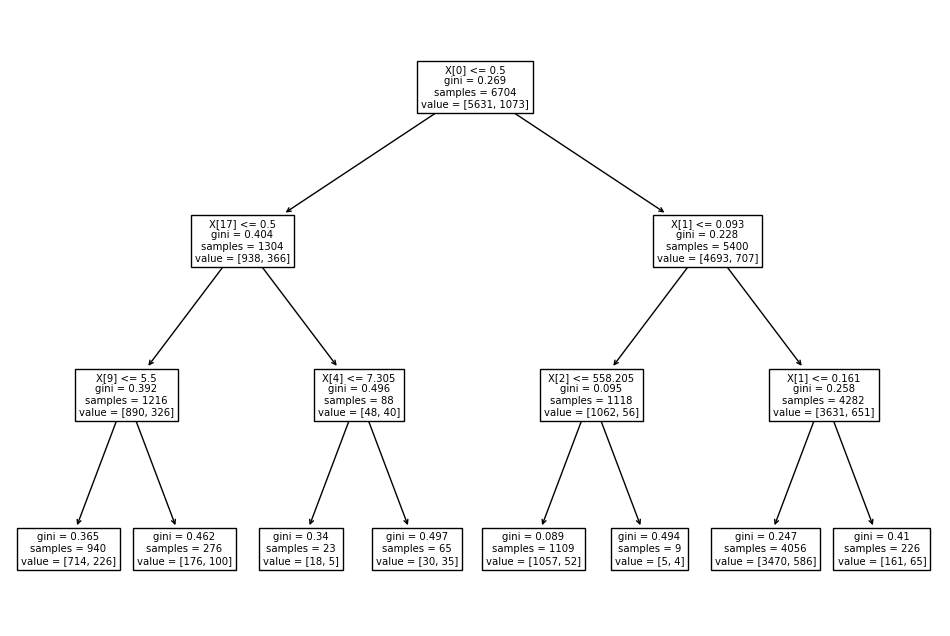

In [108]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(dtree.fit(X_train, y_train)) 

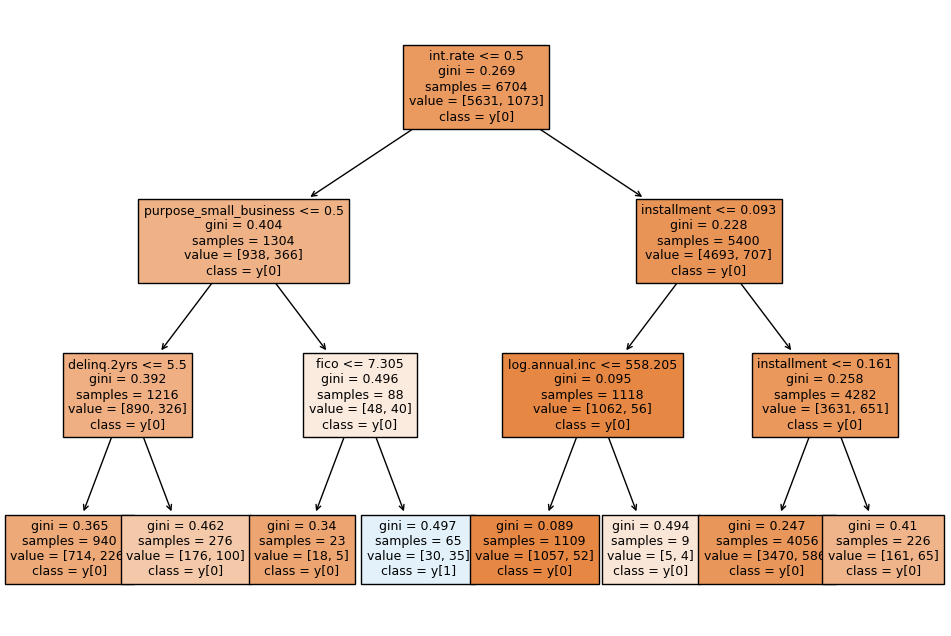

In [115]:
plt.figure(figsize=(12,8))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(dtree,feature_names=features,filled=True,fontsize=9,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Random Forest model
#### Pro
-takes average of all predictions made by decision-trees to elimates the biases  >> resolves overfitting

### n_estimators = number of trees


In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_100.fit(X_train, y_train)

rfc_10 = RandomForestClassifier(n_estimators=10, random_state=42)
rfc_10.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [120]:
rfc_pred_100 = rfc_100.predict(X_test)
rfc_pred_10 = rfc_10.predict(X_test)

## Model Performance

In [121]:
print(classification_report(y_test,rfc_pred_100))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.37      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [122]:
print(confusion_matrix(y_test,rfc_pred_100))

[[2396   12]
 [ 459    7]]


In [123]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred_100)))
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred_10)))



Model accuracy score with 100 decision-trees : 0.8361
Model accuracy score with 10 decision-trees : 0.8312


# Finding important features 

In [86]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores 

installment                   0.113595
revol.bal                     0.113389
days.with.cr.line             0.113016
dti                           0.111005
revol.util                    0.109631
log.annual.inc                0.108113
int.rate                      0.104934
fico                          0.078770
inq.last.6mths                0.056291
credit.policy                 0.015225
purpose_debt_consolidation    0.014565
delinq.2yrs                   0.014093
pub.rec                       0.009510
purpose_small_business        0.009311
purpose_credit_card           0.008642
purpose_home_improvement      0.008300
purpose_educational           0.007234
purpose_major_purchase        0.004375
dtype: float64

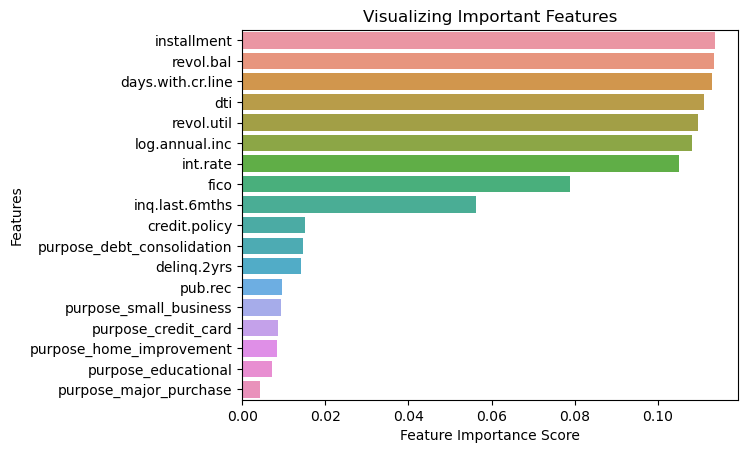

In [87]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
